In [45]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from IPython.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from real_estate import mortgage
from real_estate.metadata import Acquisition, Rehab, PreReFi_Rent, Refinance
from real_estate.aggregate import YearlySummary

In [54]:
from real_estate.analysis import PropertyPerformance

In [55]:
PropertyPerformance()

3

In [46]:
# purchase
purchase_price = 200e3
downpayment = 20e3
rehab_cost = 25e3
after_repair_value = 225e3
value_appreciation = 0.06
rent_appreciation = 0.03
opex_inflation = 0.03

# acquisition
acq_yearly_interest = 0.065
mortgage_years = 30
rehab_months = 6
yearly_taxes = 2140 # from zillow
yearly_insurance = 70

# initial rental period
monthly_rent = 3e3
vacancy_frac, repairs_frac, capex_frac = 0.05, 0.05, 0.05

# refinanced rental period 
ref_yearly_interest = 0.065
refinance_months = 9
pre_refi_duration = refinance_months-rehab_months

In [48]:
acq = Acquisition(
    purchase_price=purchase_price, 
    downpayment=downpayment, 
    yearly_interest=acq_yearly_interest, 
    value_appreciation=value_appreciation, 
    yearly_taxes=yearly_taxes
    )
rehab = Rehab(
    rehab_months=rehab_months, 
    total_cost=rehab_cost, 
    monthly_PI=acq.price['monthly_PI'], 
    owning_expenses=acq.price['owning_expenses']
    )
pre_refi = PreReFi_Rent(
    monthly_rent=monthly_rent, 
    vacancy_frac=vacancy_frac, 
    repairs_frac=repairs_frac, 
    capex_frac=capex_frac,
    total_time=pre_refi_duration, 
    monthly_PI=acq.price['monthly_PI'], 
    rent_appreciation=rent_appreciation, 
    opex_inflation=opex_inflation, 
    owning_expenses=acq.price['owning_expenses']
    )
refi = Refinance(
    monthly_rent=monthly_rent, 
    home_value=after_repair_value, 
    vacancy_frac=vacancy_frac, 
    repairs_frac=repairs_frac, 
    capex_frac=capex_frac, 
    refinance_months=refinance_months, 
    yearly_interest=ref_yearly_interest, 
    value_appreciation=value_appreciation,
    rent_appreciation=rent_appreciation, 
    opex_inflation=opex_inflation, 
    owning_expenses=acq.price['owning_expenses']
    )

In [49]:
print(str(acq))
print(str(rehab))
print(str(pre_refi))
print(str(refi))


Acquisition:
Down Payment: $20000.0
Loan Amount: $182000.0
Loan Points/Fees: $2000.0
Loan Interest Rate: 6.5%
Monthly P&I: $1150.36
Home Value Appreciaion: $6.0%

Rehab:
Holding costs: $10707.18
Monthly P&I: $1150.36
Rehab time: 6 months
Owning expenses: $634.1666666666666

Initial Rental Period:
Monthly Income: $3000.0
Monthly Expenses: $2234.53
Monthly Cashflow: $765.47
NOI: $22990.0

Refinance:
Loan Amount: $182250.0
Loan Points/Fees: $2250.0
Loan Interest Rate: 6.5%
Monthly P&I: $1151.94
Home Value Appreciaion: 6.0%


In [50]:
year_sum = YearlySummary(acq, rehab, pre_refi, refi, 30)
print(year_sum.cash_required)
df = year_sum.to_dataframe()

47000.0


,Year,Month,Renting Months,Total Annual Income,Operating Expenses,Mortgage Payment,Total Annual Expenses,Total Annual Cashflow,Cash on Cash ROI,Property Value,Loan Balance,Equity,Equity Gain,Annual Profit,Return on Equity,Cummulative Profit,Return on Initial Investment
0,0,0,6.00,"18,000.00","6,500.00","13,800.00","45,300.00","-27,300.00",-0.58,"225,000.00","182,000.00","43,200.00","-3,840.00","-31,100.00",-0.66,"-31,100.00",-0.66
1,1.00,12.00,12.00,"37,100.00","13,400.00","13,800.00","27,200.00","9,860.00",0.21,"238,000.00","182,000.00","56,800.00","13,700.00","23,500.00",0.55,"-7,630.00",-0.16
2,2.00,24.00,12.00,"38,200.00","13,800.00","13,800.00","27,600.00","10,600.00",0.23,"253,000.00","182,000.00","71,300.00","14,500.00","25,000.00",0.44,"17,400.00",0.37
3,3.00,36.00,12.00,"39,300.00","14,200.00","13,800.00","28,000.00","11,300.00",0.24,"268,000.00","181,000.00","86,600.00","15,300.00","26,600.00",0.37,"44,000.00",0.94
4,4.00,48.00,12.00,"40,500.00","14,600.00","13,800.00","28,500.00","12,100.00",0.26,"284,000.00","181,000.00","103,000.00","16,200.00","28,300.00",0.33,"72,300.00",1.54
5,5.00,60.00,12.00,"41,700.00","15,100.00","13,800.00","28,900.00","12,800.00",0.27,"301,000.00","181,000.00","120,000.00","17,200.00","30,000.00",0.29,"102,000.00",2.18
6,6.00,72.00,12.00,"43,000.00","15,500.00","13,800.00","29,400.00","13,600.00",0.29,"319,000.00","181,000.00","138,000.00","18,200.00","31,900.00",0.27,"134,000.00",2.86
7,7.00,84.00,12.00,"44,300.00","16,000.00","13,800.00","29,800.00","14,500.00",0.31,"338,000.00","181,000.00","158,000.00","19,300.00","33,800.00",0.24,"168,000.00",3.58
8,8.00,96.00,12.00,"45,600.00","16,500.00","13,800.00","30,300.00","15,300.00",0.33,"359,000.00","180,000.00","178,000.00","20,500.00","35,800.00",0.23,"204,000.00",4.34
9,9.00,108.00,12.00,"47,000.00","17,000.00","13,800.00","30,800.00","16,200.00",0.34,"380,000.00","180,000.00","200,000.00","21,700.00","37,900.00",0.21,"242,000.00",5.14


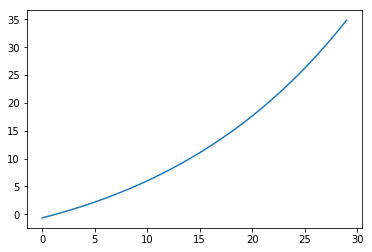

In [51]:
df['Return on Initial Investment'].plot()

In [52]:
from real_estate.analysis import generate_stock_performance
stocks_df = generate_stock_performance(0, 30, year_sum.cash_required)

In [53]:
from real_estate.plots import plot_timeseries
metric = 'Return on Initial Investment'
plot_timeseries(stocks_df[metric], 
                df[metric], 
                ['S&P', 'Real Estate', metric])